In [5]:
import cobra
from cobra.io import load_model
from pathlib import Path
from cobra.io import load_json_model, save_json_model, load_matlab_model, save_matlab_model, read_sbml_model, write_sbml_model
import logging
import pandas as pd
from cobra import Model, Reaction, Metabolite
from cobra.io import write_sbml_model, validate_sbml_model
from cobra.flux_analysis import flux_variability_analysis

%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris
pvulModel=read_sbml_model('pvulModel_lightCT+1.0.xml')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris


In [337]:
pvulModel.objective = 'Biomass'
r=cobra.flux_analysis.flux_variability_analysis(pvulModel)
r

,minimum,maximum
RXN-17121,0.000000e+00,1.000000e+03
PHOSPHOLIPASE-C-RXN,0.000000e+00,9.509711e-11
EX_STEARIC_ACID[e],-5.516336e+00,-5.516336e+00
AIRS-RXN,7.109845e+02,7.109845e+02
Trans_EX_TYR[e],-8.300748e-12,0.000000e+00
...,...,...
sink_HYDROXY-BUTYRATE_e,0.000000e+00,-6.599957e-12
SK_epi-jasmonoyl-L-isoleucine,-3.505458e-11,0.000000e+00
sink_CPD-19812_e,0.000000e+00,9.671852e-13
sink_CPD-19813_e,-2.824385e-13,-5.373350e-12


### ANALISIS DE ESCENCIALIDAD LUZ

In [67]:
# pvulModel.reactions.get_by_id('Trans_EX_OXYGEN-MOLECULE[e]').lower_bound =-1000
# pvulModel.reactions.get_by_id('Trans_EX_OXYGEN-MOLECULE[e]').upper_bound =0
# pvulModel.reactions.get_by_id('demandLight').lower_bound =-1000
# pvulModel.reactions.get_by_id('demandLight').upper_bound =1000

In [72]:
pvulModel.objective = 'Trans_EX_OXYGEN-MOLECULE[e]'
pvulModel.summary()


Metabolite,Reaction,Flux,C-Number,C-Flux
OXYGEN-MOLECULE[e],EX_OXYGEN-MOLECULE[e],1000,0,0.00%
PYRIDOXAL_PHOSPHATE[e],EX_PYRIDOXAL_PHOSPHATE[e],72,8,10.96%
STEARIC_ACID[e],EX_STEARIC_ACID[e],8,18,2.74%
CPD-11259[c],SK_epi-jasmonoyl-L-isoleucine,252,18,86.30%
Metabolite,Reaction,Flux,C-Number,C-Flux
CARBON-DIOXIDE[e],EX_CARBON-DIOXIDE[e],-540,1,10.27%
GLN[e],EX_GLN[e],-36,5,3.42%
PROTON[e],EX_PROTON[e],-1000,0,0.00%
Pi[e],EX_Pi[e],-72,0,0.00%
WATER[e],EX_WATER[e],-468,0,0.00%


In [31]:
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]')

Reaction identifier,EX_OXYGEN-MOLECULE[e]
Name,oxygen exchange
Memory address,0x15e59604700
Stoichiometry,OXYGEN-MOLECULE[e] <=> oxygen <=>
GPR,
Lower bound,-1000
Upper bound,1000


In [16]:
pvulModel.metabolites.get_by_id('OXYGEN-MOLECULE[e]')

Metabolite identifier,OXYGEN-MOLECULE[e]
Name,oxygen
Memory address,0x15e52c5b5b0
Formula,O2
Compartment,e
In 2 reaction(s),"EX_OXYGEN-MOLECULE[e], Trans_EX_OXYGEN-MOLECULE[e]"


In [148]:
pvulModel.objective = 'RXN-9643'
# resultado=single_reaction_deletion(pvulModel, pvulModel.reactions)
# resultado

In [149]:
pvulModel.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
Metabolite,Reaction,Flux,C-Number,C-Flux


In [65]:
resultadodf=pd.DataFrame(resultado)
esenciales=resultadodf[resultadodf['status']=="infeasible"]
no_esenciales = resultadodf[resultadodf["status"] == "optimal"]


In [81]:
resultado=single_gene_deletion(pvulModel, pvulModel.genes)


In [82]:
resultado

,ids,growth,status
0,{PHVUL.009G127200},0.479591,optimal
1,{PHVUL.007G183400},0.479591,optimal
2,{PHVUL.008G080800},0.479591,optimal
3,{PHVUL.002G330400},0.479591,optimal
4,{PHVUL.002G297900},0.479591,optimal
...,...,...,...
2139,{PHVUL.001G205500},0.479591,optimal
2140,{PHVUL.011G187800},0.479591,optimal
2141,{PHVUL.004G035000},0.479591,optimal
2142,{PHVUL.008G137801},0.479591,optimal


### ANALISIS DE ESCENCIALIDAD DARK

In [152]:
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').upper_bound =0
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').lower_bound =0
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('demandLight').lower_bound =0
pvulModel.reactions.get_by_id('demandLight').upper_bound =0
# pvulModel.reactions.get_by_id('EX_WATER[e]').lower_bound =0
# pvulModel.reactions.get_by_id('EX_WATER[e]').upper_bound =0
# pvulModel.reactions.get_by_id('EX_PROTON[e]').lower_bound =0
# pvulModel.reactions.get_by_id('EX_PROTON[e]').upper_bound =0
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').upper_bound =1000



In [97]:
#pvulModel.objective = 'Biomass'
resultado2=single_reaction_deletion(pvulModel, pvulModel.reactions)


In [153]:
pvulModel.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
CIT[e],EX_CIT[e],17.79,6,1.59%
ILE[e],EX_ILE[e],333.3,6,29.83%
OXYGEN-MOLECULE[e],EX_OXYGEN-MOLECULE[e],1000,0,0.00%
PYRIDOXAL_PHOSPHATE[e],EX_PYRIDOXAL_PHOSPHATE[e],74.73,8,8.92%
SUCROSE[e],EX_SUCROSE[e],333.3,12,59.66%
Metabolite,Reaction,Flux,C-Number,C-Flux
BETA-D-FRUCTOSE[e],EX_BETA-D-FRUCTOSE[e],-333.3,6,29.83%
CARBON-DIOXIDE[e],EX_CARBON-DIOXIDE[e],-831.6,1,12.40%
GLN[e],EX_GLN[e],-17.79,5,1.33%
PROTON[e],EX_PROTON[e],-946.6,0,0.00%


In [76]:
resultadodf2=pd.DataFrame(resultado2)
esenciales2=resultadodf2[resultadodf2['status']=="infeasible"]
no_esenciales2 = resultadodf2[resultadodf2["status"] == "optimal"]


In [78]:
no_esenciales2

,ids,growth,status
0,{_5.1.2.3-RXN},0.479591,optimal
1,{GLUTAMATE-DEHYDROGENASE-RXN},0.479591,optimal
2,{_1.5.1.8-RXN},0.478049,optimal
3,{RXN-11026-BUTYRYL-COA/OXYGEN-MOLECULE//CROTON...,0.479591,optimal
4,{RXN-9549},0.479591,optimal
...,...,...,...
1092,{Trans_EX_HCO3[e]},0.464753,optimal
1093,{RXN-8773-XYLITOL/NADP//BETA-D-XYLOSE/NADPH/PR...,0.479591,optimal
1094,{RXN-9657},0.479591,optimal
1095,{Trans_EX_ARG[e]},0.479591,optimal


In [79]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT

no_esenciales2.to_csv('rxns_no_esenciales2.csv')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT


In [122]:
pvulModel.boundary

[<Reaction EX_STEARIC_ACID[e] at 0x1a1ef1bde10>,
 <Reaction EX_HIS[e] at 0x1a1ef1e0190>,
 <Reaction EX_GLY[e] at 0x1a1ef2b22c0>,
 <Reaction EX_SUC[e] at 0x1a1ef2f49d0>,
 <Reaction EX_LYS[e] at 0x1a1ef3375b0>,
 <Reaction EX_PRO[e] at 0x1a1ef4121a0>,
 <Reaction EX_ASCORBATE[e] at 0x1a1ef413fd0>,
 <Reaction EX_HCO3[e] at 0x1a1ef412680>,
 <Reaction EX_CIT[e] at 0x1a1ef44a080>,
 <Reaction EX_ILE[e] at 0x1a1ef475d50>,
 <Reaction EX_BETA-D-FRUCTOSE[e] at 0x1a1ef4a7910>,
 <Reaction EX_PHE[e] at 0x1a1ed37f340>,
 <Reaction EX_SULFATE[e] at 0x1a1ee6bb8e0>,
 <Reaction EX_VAL[e] at 0x1a1ee727d30>,
 <Reaction EX_PYRIDOXAL_PHOSPHATE[e] at 0x1a1ee256590>,
 <Reaction EX_MAL[e] at 0x1a1ee256b90>,
 <Reaction EX_Pi[e] at 0x1a1ee26f520>,
 <Reaction EX_LINOLEIC_ACID[e] at 0x1a1ee37c7f0>,
 <Reaction EX_WATER[e] at 0x1a1ee37d8a0>,
 <Reaction EX_LEU[e] at 0x1a1ee511c30>,
 <Reaction EX_L-ASPARTATE[e] at 0x1a1ee6e8b50>,
 <Reaction EX_CARBON-DIOXIDE[e] at 0x1a1ee3ade10>,
 <Reaction EX_OXYGEN-MOLECULE[e] at 0x1a1e

### BOUNDARY

In [41]:
pvulModel.boundary

[<Reaction EX_STEARIC_ACID[e] at 0x15e58f29300>,
 <Reaction EX_HIS[e] at 0x15e58f5e3e0>,
 <Reaction EX_GLY[e] at 0x15e5909efe0>,
 <Reaction EX_SUC[e] at 0x15e5913e740>,
 <Reaction EX_LYS[e] at 0x15e591b3dc0>,
 <Reaction EX_PRO[e] at 0x15e592f7880>,
 <Reaction EX_ASCORBATE[e] at 0x15e5932a800>,
 <Reaction EX_HCO3[e] at 0x15e59329ae0>,
 <Reaction EX_CIT[e] at 0x15e5935d810>,
 <Reaction EX_ILE[e] at 0x15e5935ff10>,
 <Reaction EX_BETA-D-FRUCTOSE[e] at 0x15e593da320>,
 <Reaction EX_PHE[e] at 0x15e58f82530>,
 <Reaction EX_SULFATE[e] at 0x15e59509120>,
 <Reaction EX_VAL[e] at 0x15e5952cd00>,
 <Reaction EX_PYRIDOXAL_PHOSPHATE[e] at 0x15e5952fcd0>,
 <Reaction EX_MAL[e] at 0x15e5952f730>,
 <Reaction EX_Pi[e] at 0x15e59552680>,
 <Reaction EX_LINOLEIC_ACID[e] at 0x15e59553430>,
 <Reaction EX_WATER[e] at 0x15e5957b2e0>,
 <Reaction EX_LEU[e] at 0x15e59598a30>,
 <Reaction EX_L-ASPARTATE[e] at 0x15e595bbeb0>,
 <Reaction EX_CARBON-DIOXIDE[e] at 0x15e595e5480>,
 <Reaction EX_OXYGEN-MOLECULE[e] at 0x15e5

In [75]:
for i in pvulModel.boundary:
    if "WATER" in i.id:
        print(i)
        print(i.lower_bound,i.upper_bound)

EX_WATER[e]: WATER[e] <=> 
-1000.0 1000.0


### TEST DAY

In [2]:
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').upper_bound =0
pvulModel.reactions.get_by_id('demandLight').lower_bound =0
pvulModel.reactions.get_by_id('demandLight').upper_bound =1000
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').lower_bound =0
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').upper_bound = 0
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').upper_bound =0

#pvulModel.summary()

In [3]:
pvulModel.objective = 'Biomass'
solution = pvulModel.optimize()
print(solution)
# pvulModel.objective = 'sink_lotaustralin_e'
# print(pvulModel.optimize())
# pvulModel.objective = 'sink_linamarin_e'
# print(pvulModel.optimize())



<Solution 0.506 at 0x17256f02230>


#### FVA DAY

In [311]:
fva_day=flux_variability_analysis(pvulModel)



In [312]:
listafva_day={}
for index,row in fva_day.iterrows():
    value=(row['minimum'],row['maximum'])
    listafva_day[index]=value
len(listafva_day)

1097

In [316]:
listMagnitudes_day ={}
for index,values in listafva_day.items():
    if values[0] <0 and values[1] >0:
        magnitude = abs(values[0])+values[1]
        listMagnitudes_day[index]=magnitude
    elif values[0] <0 and values[1] <0:
        magnitude = abs(values[0])-abs(values[1])
        listMagnitudes_day[index]=magnitude
    elif values[0] >0 and values[1] >0:
        magnitude = values[1]-values[0]
        listMagnitudes_day[index]=magnitude

len(listMagnitudes_day)

430

In [317]:
critical_day={index:magnitud for index,magnitud in listMagnitudes_day.items() if magnitud <1 and magnitud >-1}
len(critical_day)


196

In [318]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA
df = pd.DataFrame.from_dict(critical_day, orient='index', columns=['value'])
df.to_csv('critical_day.csv',decimal=',',sep=';')


C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA


### TEST NIGHT

In [6]:
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').lower_bound =0
pvulModel.reactions.get_by_id('EX_OXYGEN-MOLECULE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('demandLight').lower_bound =0
pvulModel.reactions.get_by_id('demandLight').upper_bound =0
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_CARBON-DIOXIDE[e]').upper_bound =0
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_SUCROSE[e]').upper_bound =1000
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').lower_bound =-1000
pvulModel.reactions.get_by_id('EX_BETA-D-FRUCTOSE[e]').upper_bound =1000


#pvulModel.summary()

In [7]:
pvulModel.objective = 'Biomass'
solution_night=pvulModel.optimize()
print(solution_night)
# pvulModel.objective = 'sink_lotaustralin_e'
# print(pvulModel.optimize())
# pvulModel.objective = 'sink_linamarin_e'
# print(pvulModel.optimize())
# %cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA
# fluxess_biomass_night=solution.fluxes
# fluxess_biomass_night.to_csv('fluxess_biomass_night.csv')


<Solution 0.427 at 0x17257937310>


In [331]:
random=flux_variability_analysis(pvulModel)

In [332]:
random

,minimum,maximum
RXN-17121,0.000000e+00,1000.000000
PHOSPHOLIPASE-C-RXN,0.000000e+00,1000.000000
EX_STEARIC_ACID[e],-1.000000e+03,1000.000000
AIRS-RXN,-1.070007e-14,644.485379
Trans_EX_TYR[e],-1.000000e+03,0.000000
...,...,...
sink_HYDROXY-BUTYRATE_e,0.000000e+00,0.000000
SK_epi-jasmonoyl-L-isoleucine,-1.934090e-13,0.000000
sink_CPD-19812_e,0.000000e+00,0.000000
sink_CPD-19813_e,0.000000e+00,0.000000


In [ ]:
# listO2=[]
# for i in pvulModel.metabolites.get_by_id('OXYGEN-MOLECULE[c]').reactions:
#     for j in i.metabolites:
#         compound =i.metabolites[j]
#         if j.id == 'OXYGEN-MOLECULE[c]':
#             value=i.metabolites[j]
#             if value <0:
#                 print(i.id)
#                 listO2.append(i.id)
#                 print(value)


        

#### FVA NIGHT

In [322]:
fva_night=flux_variability_analysis(pvulModel)



In [323]:
listafva_night={}
for index,row in fva_night.iterrows():
    value=(row['minimum'],row['maximum'])
    listafva_night[index]=value
len(listafva_night)

1097

In [324]:
listMagnitudes_night ={}
for index,values in listafva_night.items():
    if values[0] <0 and values[1] >0:
        magnitude = abs(values[0])+values[1]
        listMagnitudes_night[index]=magnitude
    elif values[0] <0 and values[1] <0:
        magnitude = abs(values[0])-abs(values[1])
        listMagnitudes_night[index]=magnitude
    elif values[0] >0 and values[1] >0:
        magnitude = values[1]-values[0]
        listMagnitudes_night[index]=magnitude

len(listMagnitudes_night)

407

In [325]:
critical_night={index:magnitud for index,magnitud in listMagnitudes_night.items() if magnitud <1 and magnitud >-1}
len(critical_night)


159

In [326]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA
df = pd.DataFrame.from_dict(critical_night, orient='index', columns=['value'])
df.to_csv('critical_night.csv',decimal=',',sep=';')


C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FVA


### FLUXES ANALYSIS DAY AND NIGHT

In [4]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA
fluxess_biomass_day=solution.fluxes
#fluxess_biomass_day.to_csv('fluxess_biomass_day.csv')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA


In [14]:
%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA
fluxess_biomass_day.to_csv('fluxess_biomass_day.csv',decimal=',',sep=';')

C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA


In [8]:
fluxess_biomass_night=solution_night.fluxes


In [15]:
fluxess_biomass_night.to_csv('fluxess_biomass_night.csv',decimal=',',sep=';')

In [9]:
import pandas as pd

In [10]:
fluxes_Day_Night=pd.concat([fluxess_biomass_day,fluxess_biomass_night],axis=1,keys=['Day','Night'])
#fluxes_Day_Night=fluxes_Day_Night.rename(columns={'fluxes':'Day','fluxes':'Night'})
# fluxes_Day_Night.to_csv('fluxes_Day_Night.csv',decimal=',',sep=';')




In [11]:
fluxes_Day_Night

,Day,Night
RXN-17121,0.000000,0.000000e+00
PHOSPHOLIPASE-C-RXN,0.000000,0.000000e+00
EX_STEARIC_ACID[e],-5.516336,-4.656310e+00
AIRS-RXN,710.984483,6.001382e+02
Trans_EX_TYR[e],0.000000,0.000000e+00
...,...,...
sink_HYDROXY-BUTYRATE_e,0.000000,0.000000e+00
SK_epi-jasmonoyl-L-isoleucine,0.000000,0.000000e+00
sink_CPD-19812_e,0.000000,0.000000e+00
sink_CPD-19813_e,0.000000,0.000000e+00


In [12]:
# fluxes=pd.DataFrame(columns=['Day','Night'])
# for index,row in fluxes_Day_Night.iterrows():
#     if (row['Day'] != row['Night']) and (row['Day'] == 0) and (row['Night'] == 0):
#         if row['Day']-row['Night'] != 0:
#             fluxes.loc[index]=[(row['Day']),(row['Night'])]

df_filtered=fluxes_Day_Night[fluxes_Day_Night['Day']!=fluxes_Day_Night['Night']]
df_filtered=df_filtered[(df_filtered['Day']!=0) & (df_filtered['Night']!=0)]

In [29]:
df_filtered

,Day,Night
EX_STEARIC_ACID[e],-5.516336,-4.656310e+00
AIRS-RXN,710.984483,6.001382e+02
GART-RXN,710.984483,6.001382e+02
_1.5.1.9-RXN,581.718249,5.057358e+01
_2-KETO-ADIPATE-DEHYDROG-RXN,581.718249,5.057358e+01
...,...,...
EX_MYO-INOSITOL[e],-10.640873,-8.981905e+00
AICARSYN-RXN,710.984483,6.001382e+02
Trans_EX_MYO-INOSITOL[e],10.640873,8.981905e+00
Biomass,0.505899,4.270264e-01


In [30]:
import scipy.stats as stats

# Perform Wilcoxon signed-rank test
statistic, p_value = stats.wilcoxon(df['Day'], df['Night'])

# Print the results
print('Wilcoxon signed-rank test statistic:', statistic)
print('Wilcoxon signed-rank test p-value:', p_value)

Wilcoxon signed-rank test statistic: 3282.5
Wilcoxon signed-rank test p-value: 0.0019187329528676418


C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA


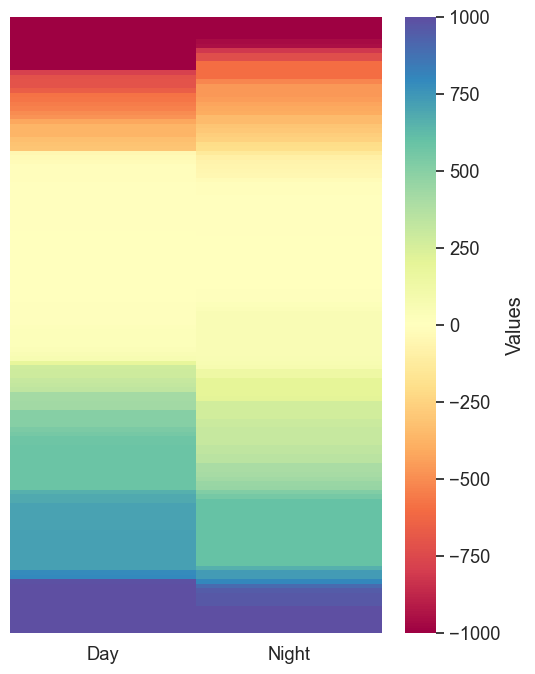

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%cd C:\Users\duart\OneDrive\Documentos\UNIANDES\PHASEOLUS LUNATUS\MODELS\OTHER_SPECIES\Phaseolus vulgaris\SUPPORT\FBA

# Read the input table into a pandas dataframe
df=df_sorted

# Define the custom colormap
colors = ["#154AC4", "#FFFFFF","#9052EE","#9EA3B0"]  # Red to Blue
n_colors = 256  # Number of colors in the colormap
cmap_name = 'my_custom_cmap'
# cm = LinearSegmentedColormap.from_list(cmap_name, colors, n_colors)
cm=sns.color_palette("Spectral", as_cmap=True)



# Create the heatmap
#plt.rc('font', size=145)          # controls default text sizes')
fig, ax = plt.subplots(figsize=(6,8))
# cmap = sns.color_palette("RdBu_r", n_colors=256)
sns.set(font_scale=1.2)
sns.heatmap(df, cmap=cm, xticklabels=True, yticklabels=False,cbar_kws={'label': 'Values'}, ax=ax)
plt.savefig('heatmapFluxesFBA_Biomass.jpg', dpi=300, bbox_inches='tight')


In [55]:
fluxes_Day_Night.to_csv('fluxes_Day_Night.csv')

In [108]:
pvulModel.reactions.get_by_id('BENZALDEHYDE-DEHYDROGENASE-NAD+-RXN')

Reaction identifier,BENZALDEHYDE-DEHYDROGENASE-NAD+-RXN
Name,BENZALDEHYDE-DEHYDROGENASE-NAD+-RXN
Memory address,0x1ecea021ae0
Stoichiometry,BENZALDEHYDE[c] + NAD[c] + WATER[c] <=> BENZOATE[c] + NADH[c] + 2.0 PROTON[c] benzaldehyde + NAD+ + H2O <=> benzoate + NADH + 2.0 H+
GPR,PHVUL.L009143 or PHVUL.002G275200 or PHVUL.001G072600 or PHVUL.004G018000 or PHVUL.011G059400 or...
Lower bound,-1000.0
Upper bound,1000.0
